In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

точность модели с 1 уровнями = 60.0 %


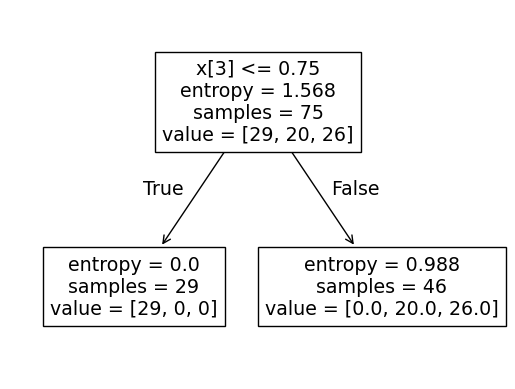

точность модели с 2 уровнями = 89.33333333333333 %


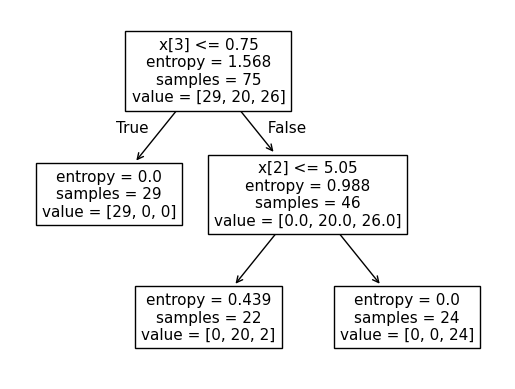

точность модели с 3 уровнями = 96.0 %


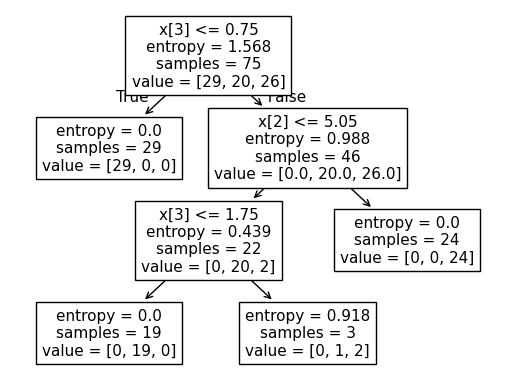

точность модели с 4 уровнями = 96.0 %


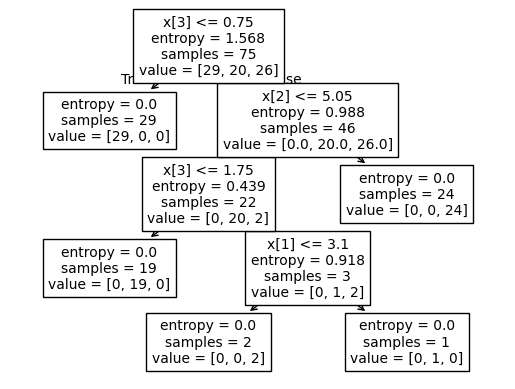

In [2]:
x, y = load_iris(return_X_y=True)


x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.5, random_state=0)


for i in range(1, 5, 1):

    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=i, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_pred, y_test)
    print(f'точность модели с {i} уровнями = {accuracy * 100} %')

    plot_tree(model)
    plt.show()


In [4]:
# Задание 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('.\\data\\dataset_gender.csv')
x = data[['Height', 'Weight']]
y = np.ravel(data[['Gender']])


encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.99, random_state=0)


for i in [2, 5, 10, 20, 50]:

    model_forest = RandomForestClassifier(n_estimators=i, criterion='entropy',
                                          max_depth=3, random_state=0)

    model_forest.fit(x_train, y_train)

    y_pred = model_forest.predict(x_test)

    accuracy_train = accuracy_score(model_forest.predict(x_train), y_train)
    accuracy_test = accuracy_score(model_forest.predict(x_test), y_test)
    print(f'Точность метода при количестве деревьев N = {i}:\n'
          f'На обучающем наборе: {accuracy_train * 100} %\n'
          f'На тестовом наборе: {accuracy_test * 100} %\n')



Точность метода при количестве деревьев N = 2:
На обучающем наборе: 87.0 %
На тестовом наборе: 86.23232323232322 %

Точность метода при количестве деревьев N = 5:
На обучающем наборе: 89.0 %
На тестовом наборе: 88.65656565656566 %

Точность метода при количестве деревьев N = 10:
На обучающем наборе: 92.0 %
На тестовом наборе: 89.26262626262627 %

Точность метода при количестве деревьев N = 20:
На обучающем наборе: 91.0 %
На тестовом наборе: 89.22222222222223 %

Точность метода при количестве деревьев N = 50:
На обучающем наборе: 93.0 %
На тестовом наборе: 89.43434343434343 %



Точность на обучающем наборе: 88.94285714285715 %
Точность на тестовом наборе: 88.2 %


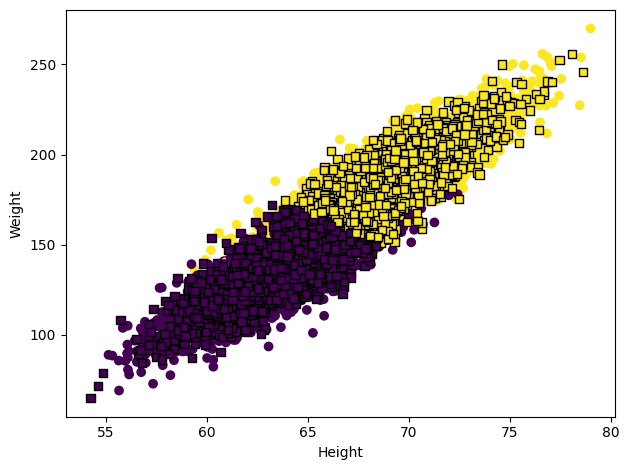

In [5]:
# Задание 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


data = pd.read_csv('.\\data\\dataset_gender.csv')
x = data[['Height', 'Weight']]
y = np.ravel(data[['Gender']])


encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)


bayes = GaussianNB()
bayes.fit(x_train, np.ravel(y_train))
y_pred = bayes.predict(x_test)


accuracy_train = accuracy_score(bayes.predict(x_train), y_train)
accuracy_test = accuracy_score(bayes.predict(x_test), y_test)
print(f'Точность на обучающем наборе: {accuracy_train * 100} %')
print(f'Точность на тестовом наборе: {accuracy_test * 100} %')


fig1 = plt.figure()

axs1 = fig1.add_subplot(1, 1, 1, xlabel='Height', ylabel='Weight')
gph1 = axs1.scatter(x_train[['Height']], x_train[['Weight']], c=np.array(y_train))
gph2 = axs1.scatter(x_test[['Height']], x_test[['Weight']], c=np.array(y_pred),
                    marker='s', edgecolor='k')

plt.tight_layout()
plt.show()
